In [1]:
import vitaldb
import os
import pandas as pd
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

In [2]:
caseids = vitaldb.find_cases(['ECG_II'])

In [3]:
print(len(caseids))

6355


In [4]:
vals = vitaldb.load_case(caseids[0], ['ECG_II'], 1/100)
print(vals)

[[        nan]
 [        nan]
 [        nan]
 ...
 [ 0.148893  ]
 [-0.32508701]
 [        nan]]


In [5]:
ecg1 = vals[:, 0]
ecg2 = vitaldb.load_case(caseids[1], ['ECG_II'], 1/100)[:, 0]
ecg3 = vitaldb.load_case(caseids[2], ['ECG_II'], 1/100)[:, 0]
ecg4 = vitaldb.load_case(caseids[3], ['ECG_II'], 1/100)[:, 0]

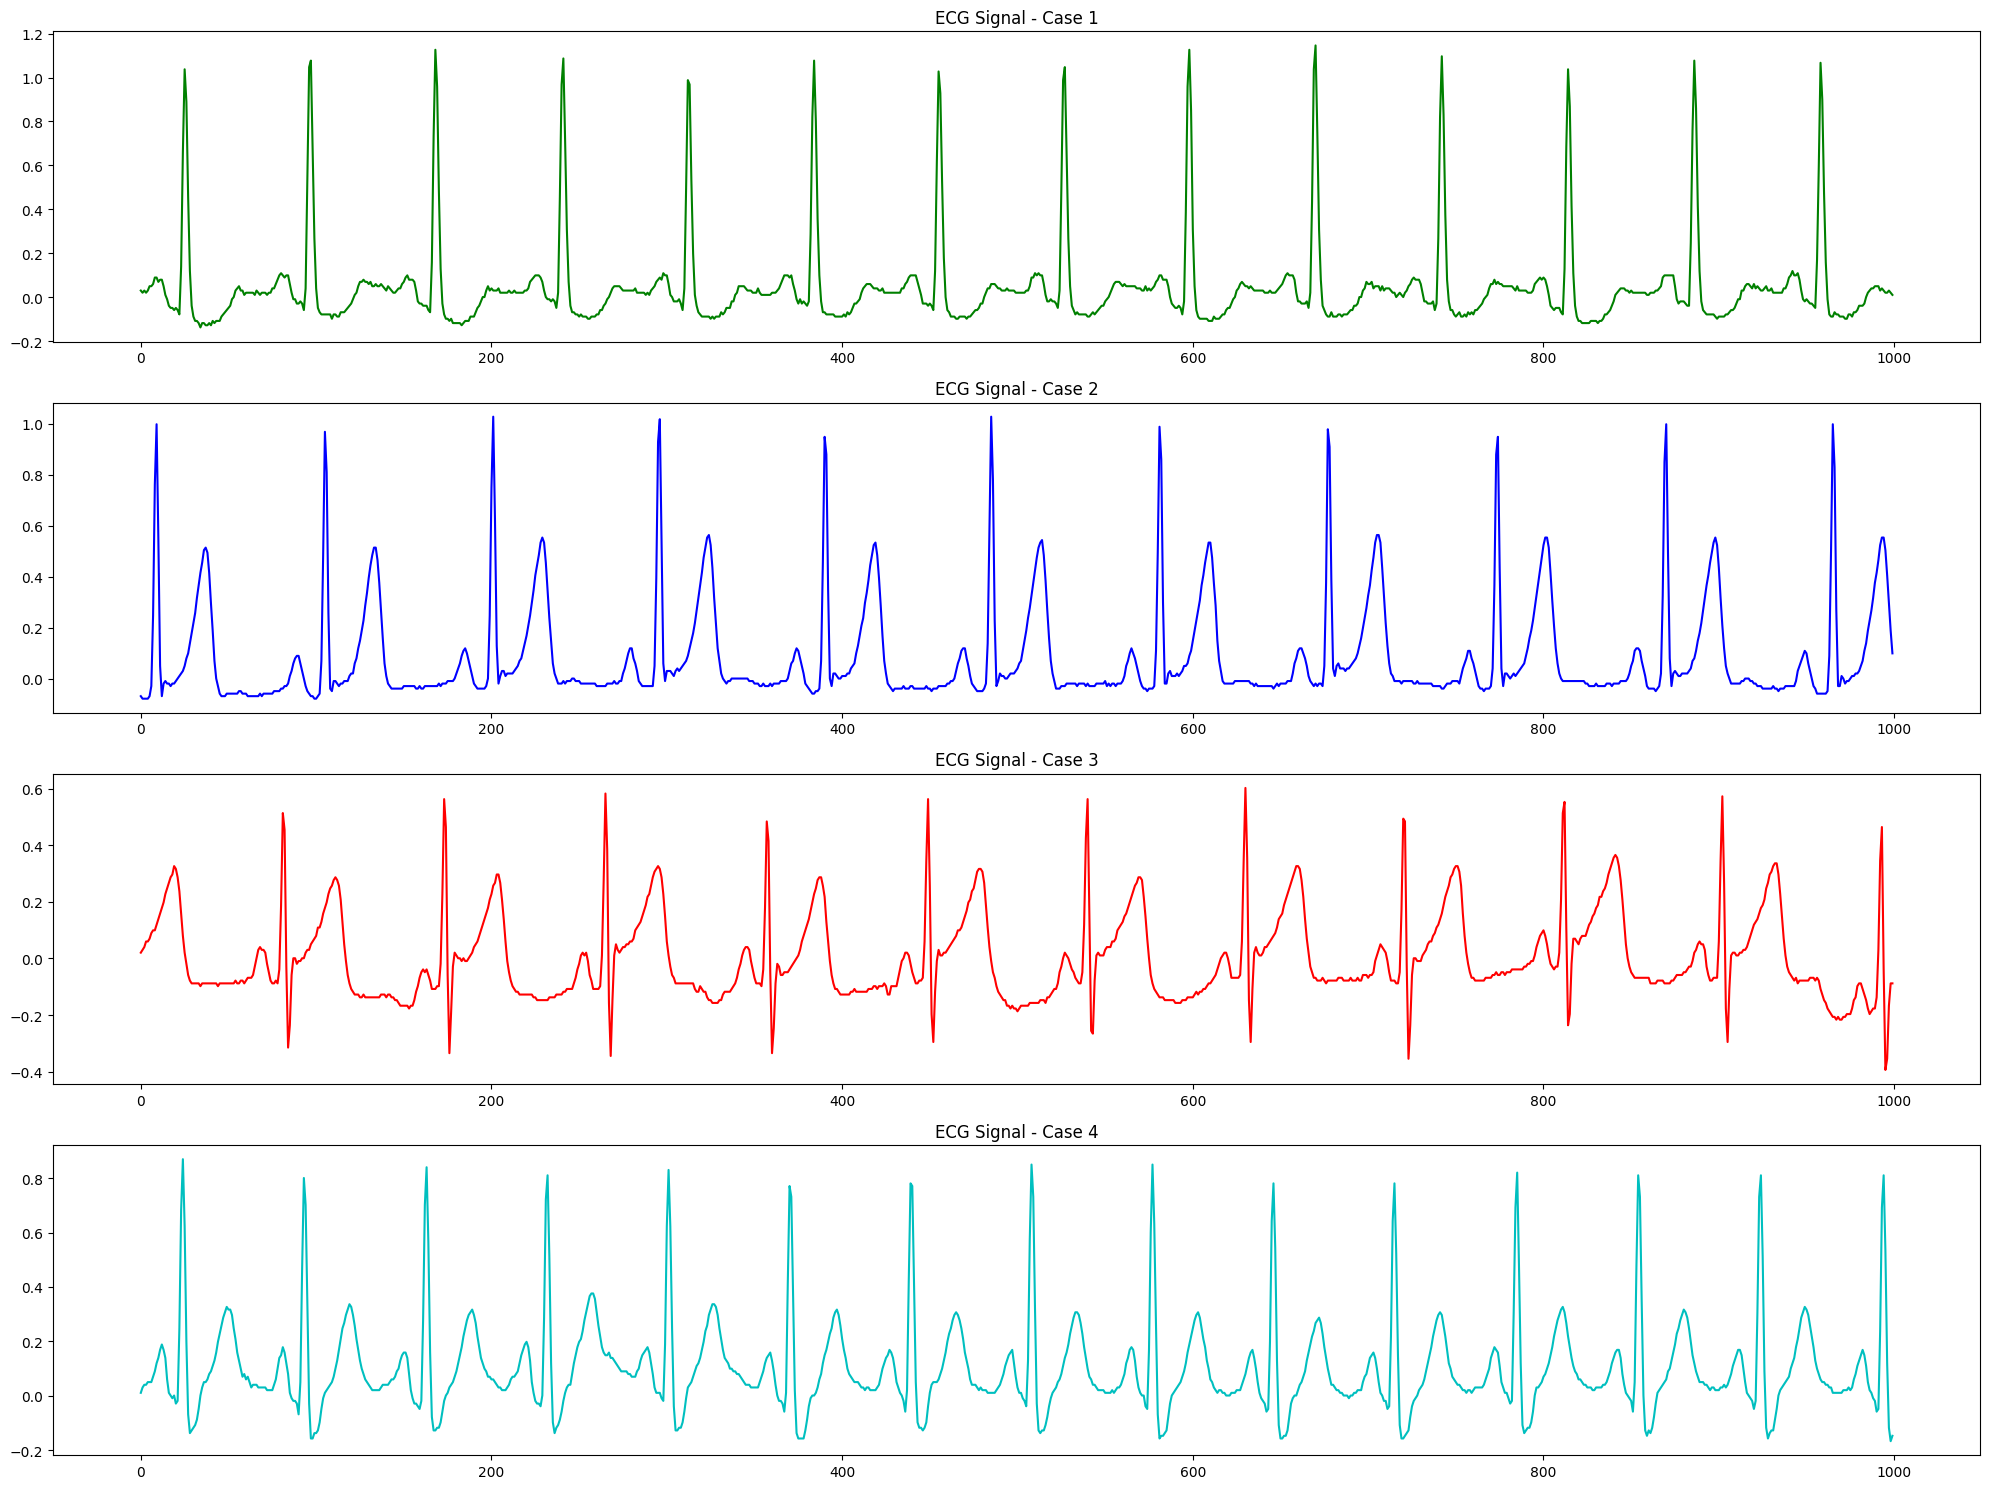

In [6]:
plt.figure(figsize=(20, 15))

plt.subplot(411)
plt.plot(ecg1[110000:111000], color='g')
plt.title('ECG Signal - Case 1')

plt.subplot(412)
plt.plot(ecg2[110000:111000], color='b')
plt.title('ECG Signal - Case 2')

plt.subplot(413)
plt.plot(ecg3[110000:111000], color='r')
plt.title('ECG Signal - Case 3')

plt.subplot(414)
plt.plot(ecg4[110000:111000], color='c')
plt.title('ECG Signal - Case 4')

plt.tight_layout()
plt.show()

Valor final do vetor de tempo da série 1 em segundos: 11541.10 segundos
Valor final do vetor de tempo da série 1 em horas: 3.21 horas
Valor final do vetor de tempo da série 2 em segundos: 15740.40 segundos
Valor final do vetor de tempo da série 2 em horas: 4.37 horas
Valor final do vetor de tempo da série 3 em segundos: 4394.04 segundos
Valor final do vetor de tempo da série 3 em horas: 1.22 horas
Valor final do vetor de tempo da série 4 em segundos: 20989.40 segundos
Valor final do vetor de tempo da série 4 em horas: 5.83 horas


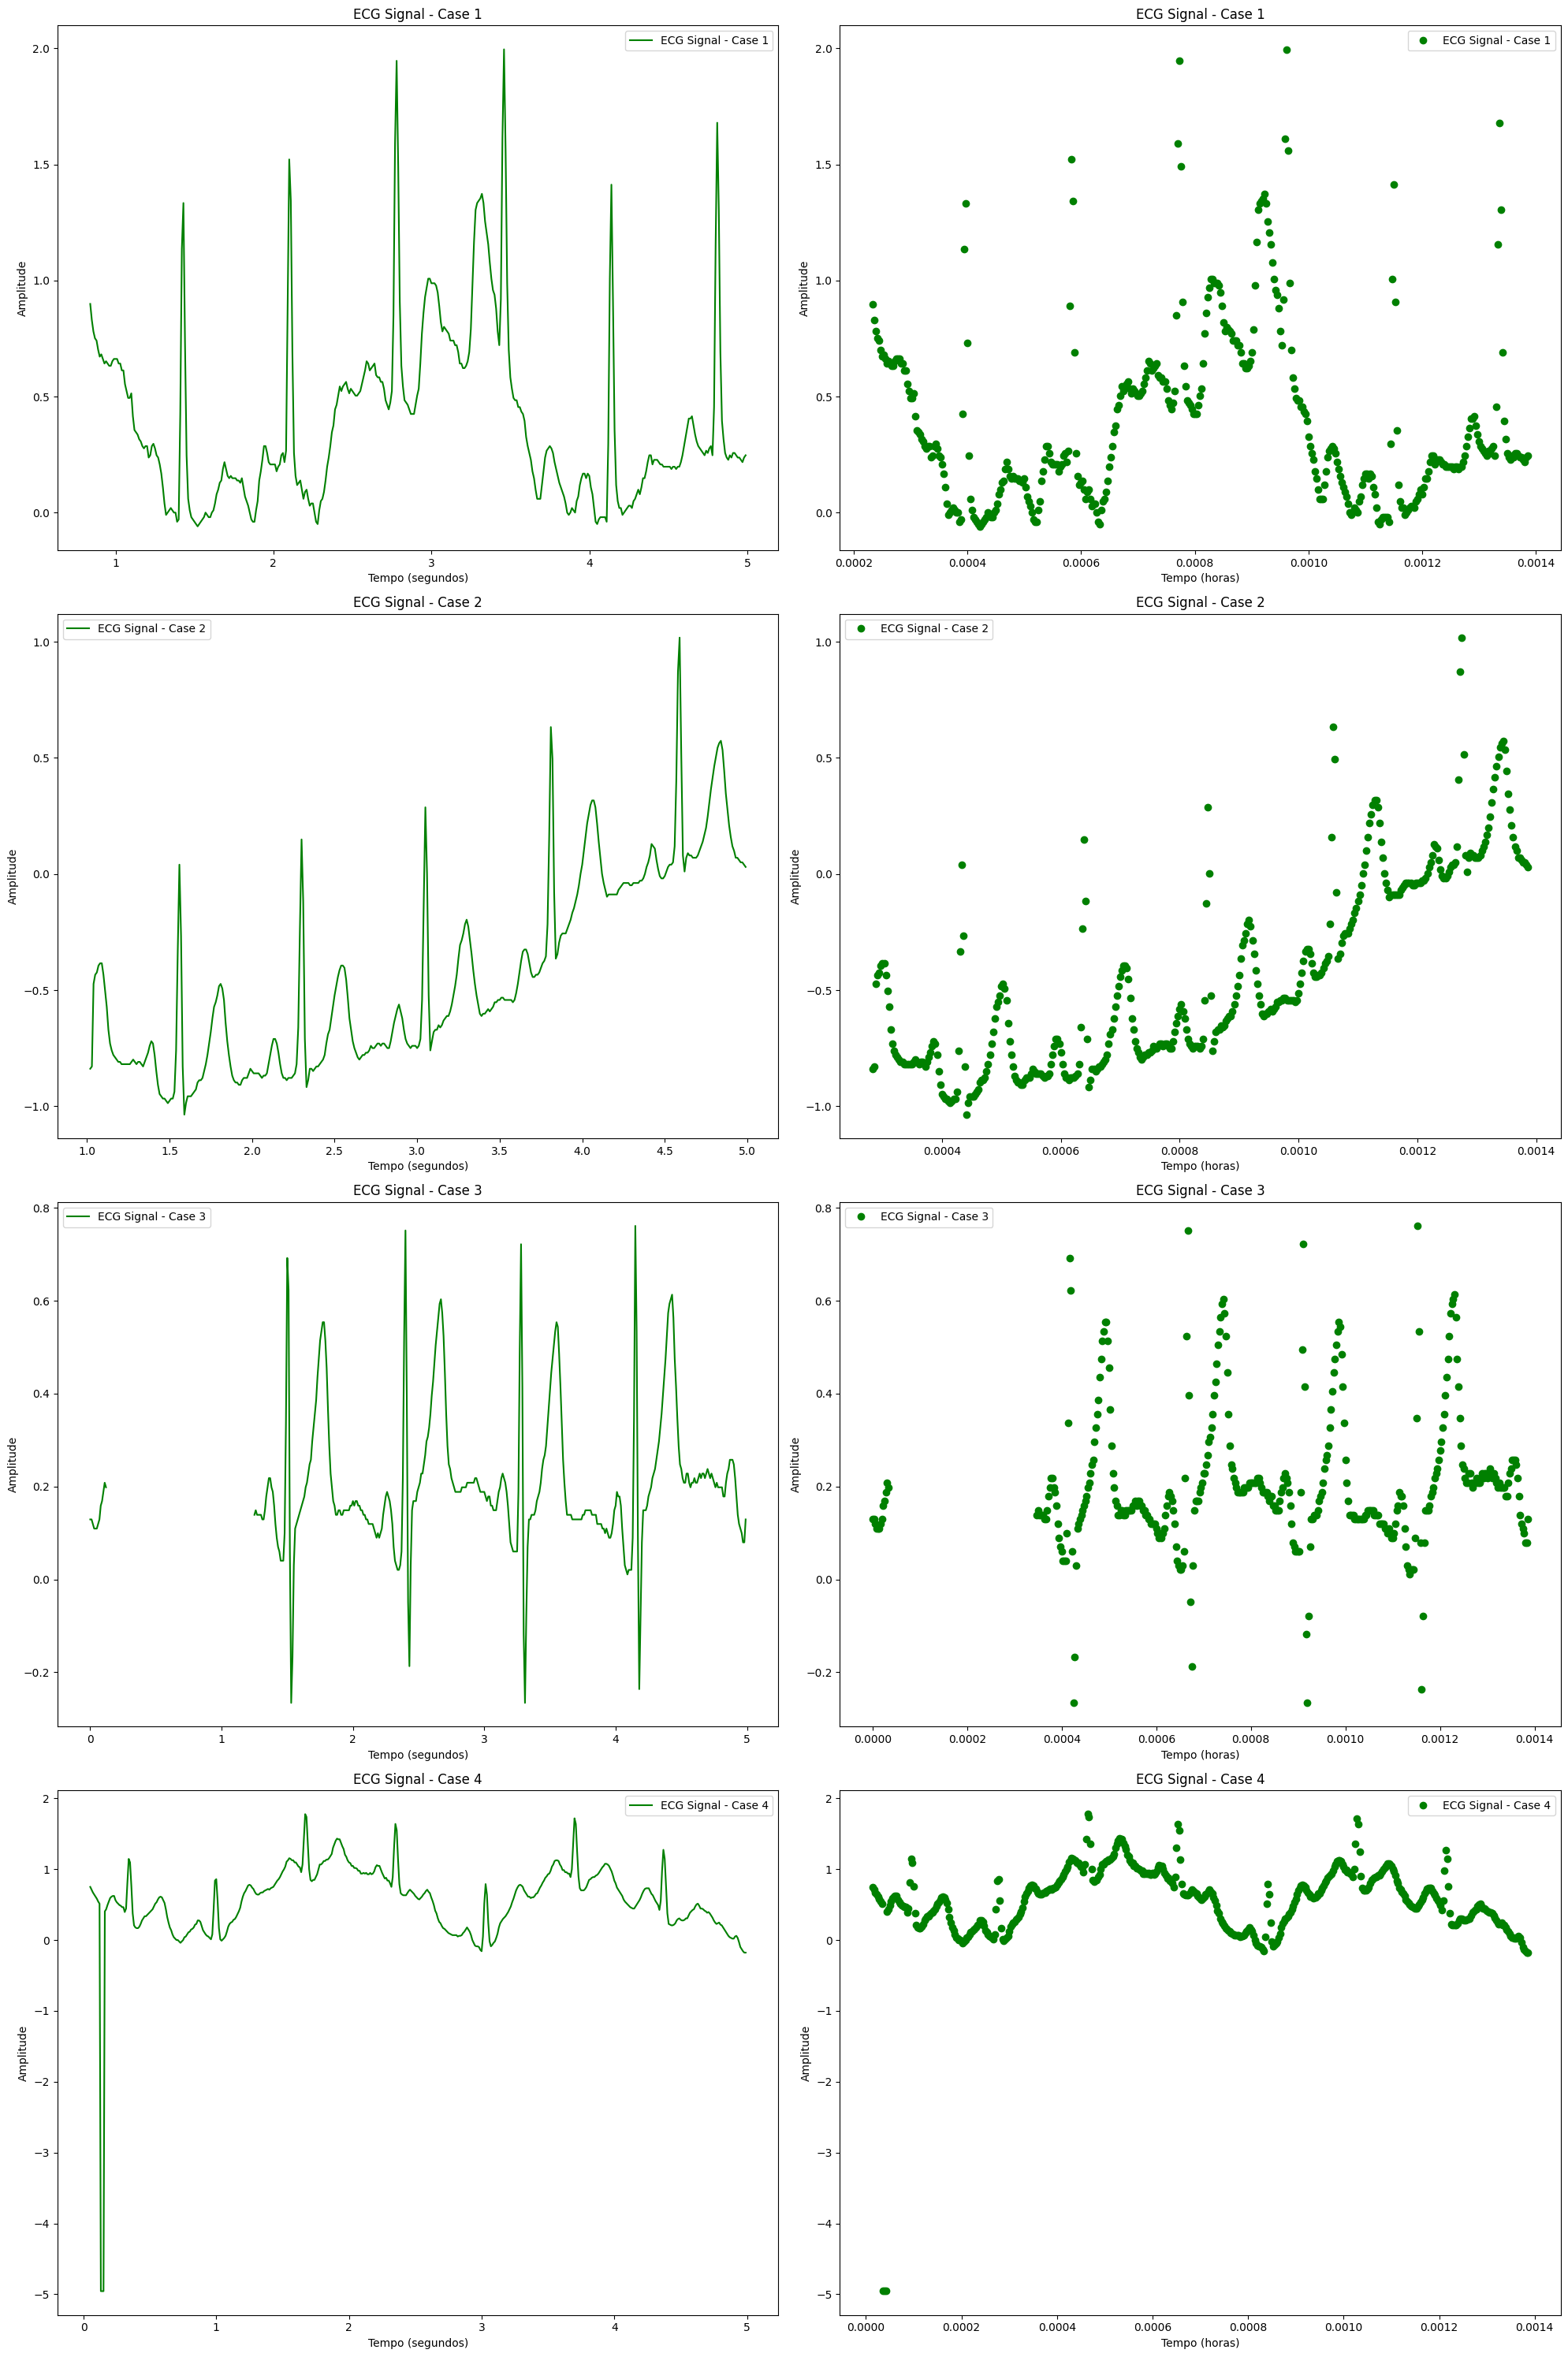

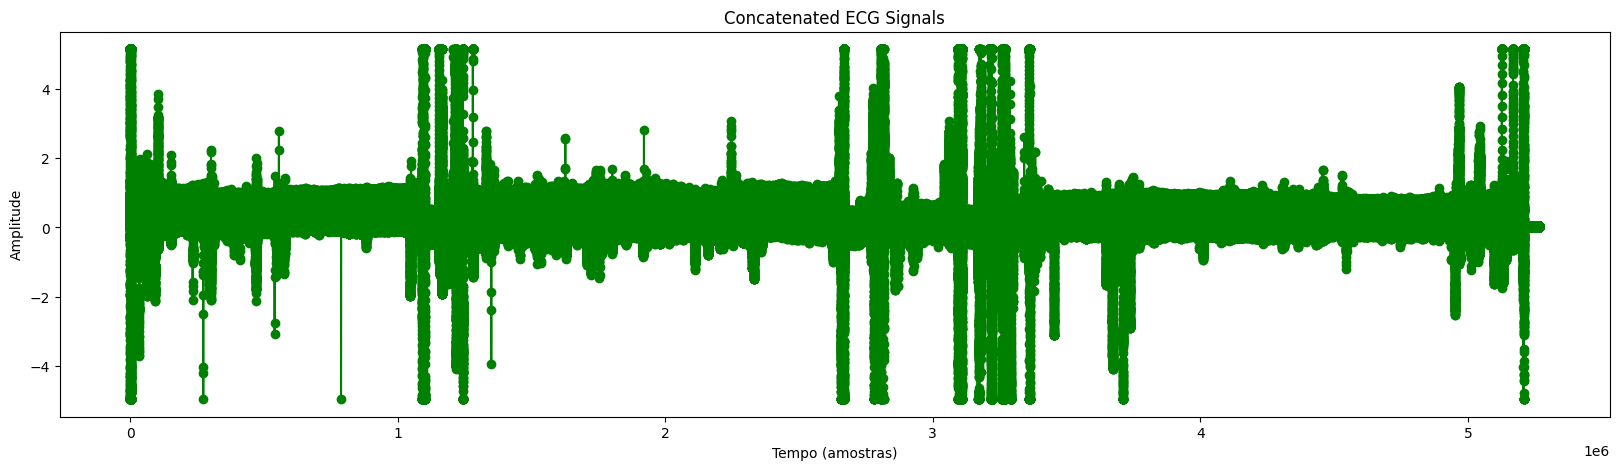

In [8]:
all_ecg = np.array([])

plt.figure(figsize=(20, 30))

for i in range(4):
    vals = vitaldb.load_case(caseids[i], ['ECG_II'], 1/100)
    
    ecg = vals[:, 0]
    intervalo_amostragem = 1/100

    all_ecg = np.concatenate((all_ecg, ecg))

    tempo = np.arange(0, len(ecg) * intervalo_amostragem, intervalo_amostragem)
    tempo_em_horas = tempo / 3600.0

    indices = np.arange(0, 500)

    plt.subplot(4, 2, 2*i+1)
    plt.plot(tempo[indices], ecg[indices], color='g', linestyle='-', label=f'ECG Signal - Case {i+1}')
    plt.title(f'ECG Signal - Case {i+1}')
    plt.xlabel('Tempo (segundos)')
    plt.ylabel('Amplitude')
    plt.legend()

    plt.subplot(4, 2, 2*i+2)
    plt.plot(tempo_em_horas[indices], ecg[indices], color='g', linestyle='', marker='o', label=f'ECG Signal - Case {i+1}')
    plt.title(f'ECG Signal - Case {i+1}')
    plt.xlabel('Tempo (horas)')
    plt.ylabel('Amplitude')
    plt.legend()

    valor_final_tempo_segundos = tempo[-1]
    valor_final_tempo_horas = tempo_em_horas[-1]
    print(f'Valor final do vetor de tempo da série {i+1} em segundos: {valor_final_tempo_segundos:.2f} segundos')
    print(f'Valor final do vetor de tempo da série {i+1} em horas: {valor_final_tempo_horas:.2f} horas')

plt.tight_layout()
plt.show()

plt.figure(figsize=(20, 5))
plt.plot(all_ecg, color='g', linestyle='-', marker='o')
plt.title('Concatenated ECG Signals')
plt.xlabel('Tempo (amostras)')
plt.ylabel('Amplitude')
plt.show()

Valor final do vetor de tempo da série concatenada em segundos: 11541.11 segundos
Valor final do vetor de tempo da série concatenada em horas: 3.21 horas
Valor final do vetor de tempo da série concatenada em segundos: 27281.52 segundos
Valor final do vetor de tempo da série concatenada em horas: 7.58 horas
Valor final do vetor de tempo da série concatenada em segundos: 31675.57 segundos
Valor final do vetor de tempo da série concatenada em horas: 8.80 horas
Valor final do vetor de tempo da série concatenada em segundos: 52664.98 segundos
Valor final do vetor de tempo da série concatenada em horas: 14.63 horas


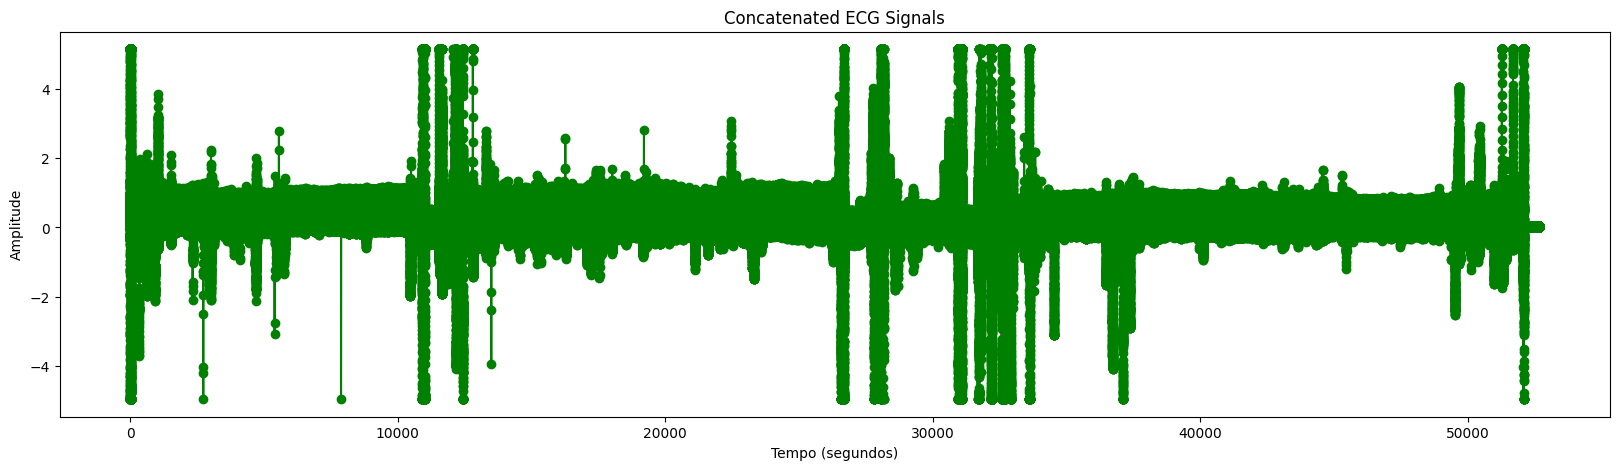

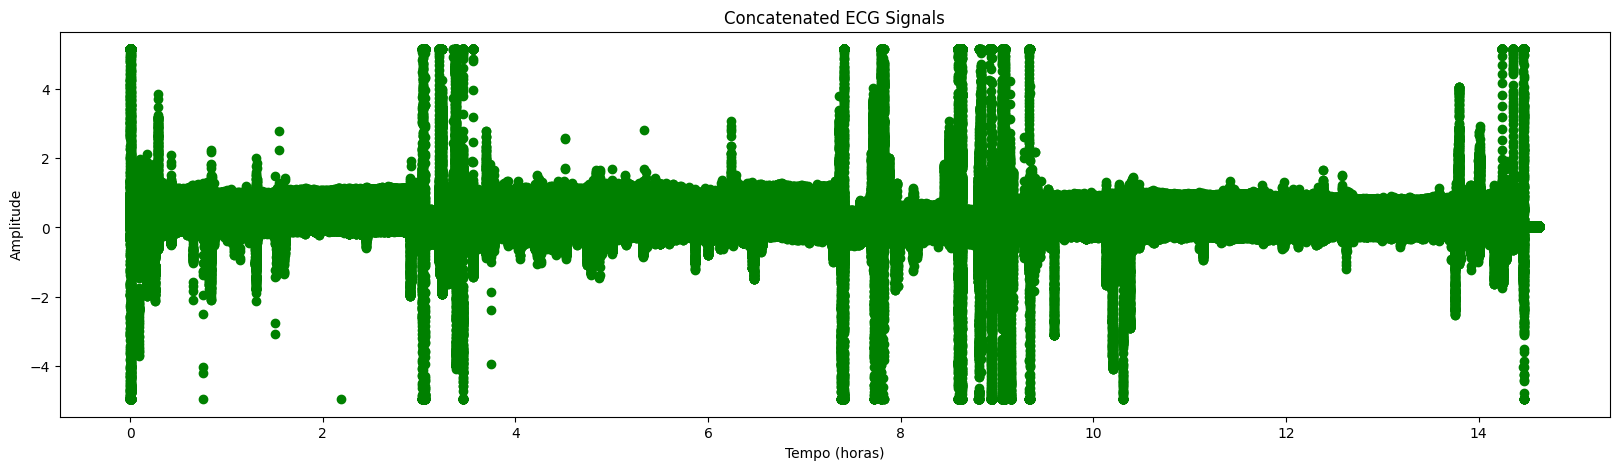

In [9]:
all_ecg = np.array([])

for i in range(4):
    vals = vitaldb.load_case(caseids[i], ['ECG_II'], 1/100)
    
    ecg = vals[:, 0]
    intervalo_amostragem = 1/100

    all_ecg = np.concatenate((all_ecg, ecg))

    valor_final_tempo_segundos = len(all_ecg) * intervalo_amostragem
    valor_final_tempo_horas = valor_final_tempo_segundos / 3600.0
    print(f'Valor final do vetor de tempo da série concatenada em segundos: {valor_final_tempo_segundos:.2f} segundos')
    print(f'Valor final do vetor de tempo da série concatenada em horas: {valor_final_tempo_horas:.2f} horas')

plt.figure(figsize=(20, 5))

tempo_segundos = np.arange(0, valor_final_tempo_segundos, intervalo_amostragem)
tempo_horas = tempo_segundos / 3600.0

plt.plot(tempo_segundos, all_ecg, color='g', linestyle='-', marker='o')
plt.title('Concatenated ECG Signals')
plt.xlabel('Tempo (segundos)')
plt.ylabel('Amplitude')
plt.show()

plt.figure(figsize=(20, 5))
plt.plot(tempo_horas, all_ecg, color='g', linestyle='', marker='o')
plt.title('Concatenated ECG Signals')
plt.xlabel('Tempo (horas)')
plt.ylabel('Amplitude')
plt.show()

In [10]:
# df_all_ecg = pd.DataFrame({'ecg': all_ecg})
# df_all_ecg.to_csv('ecg_all.csv', index=False)
# print("Arquivo CSV gerado com sucesso!")

In [11]:
def segundos_para_horas(segundos):
    horas = segundos / 3600.0
    return horas

Valor final do vetor de tempo da série concatenada em segundos: 300.00 segundos
Valor final do vetor de tempo da série concatenada em horas: 0.08 horas
Valor final do vetor de tempo da série concatenada em segundos: 600.00 segundos
Valor final do vetor de tempo da série concatenada em horas: 0.17 horas
Valor final do vetor de tempo da série concatenada em segundos: 900.00 segundos
Valor final do vetor de tempo da série concatenada em horas: 0.25 horas
Valor final do vetor de tempo da série concatenada em segundos: 1200.00 segundos
Valor final do vetor de tempo da série concatenada em horas: 0.33 horas
Valor final do vetor de tempo da série concatenada em segundos: 1500.00 segundos
Valor final do vetor de tempo da série concatenada em horas: 0.42 horas
Valor final do vetor de tempo da série concatenada em segundos: 1800.00 segundos
Valor final do vetor de tempo da série concatenada em horas: 0.50 horas
Valor final do vetor de tempo da série concatenada em segundos: 2100.00 segundos
Valo

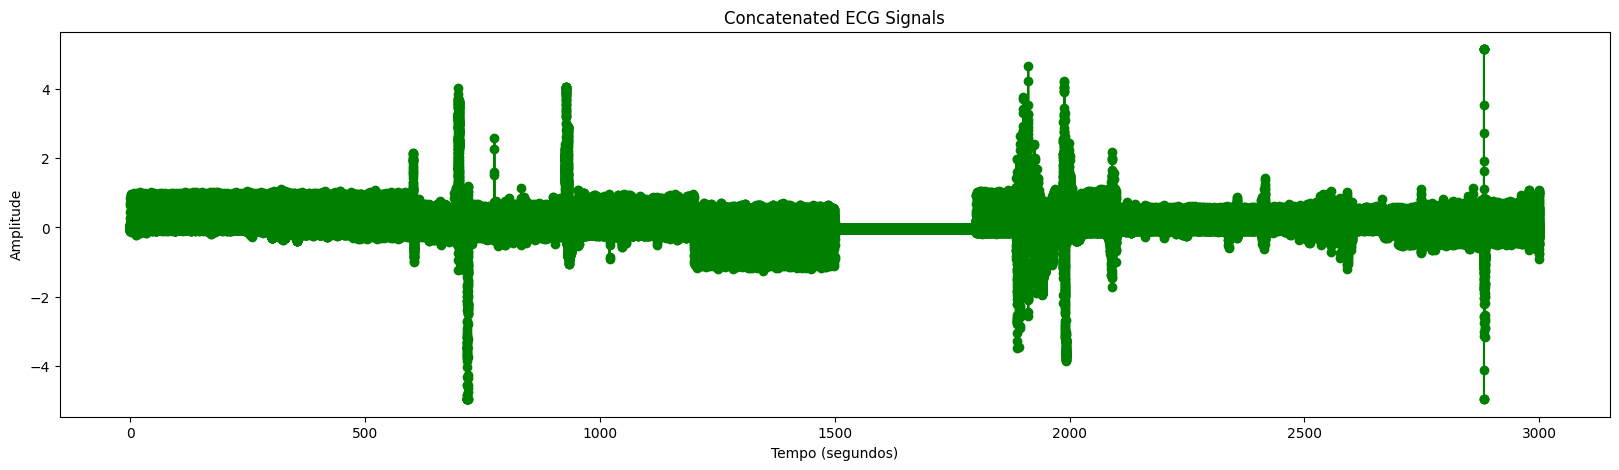

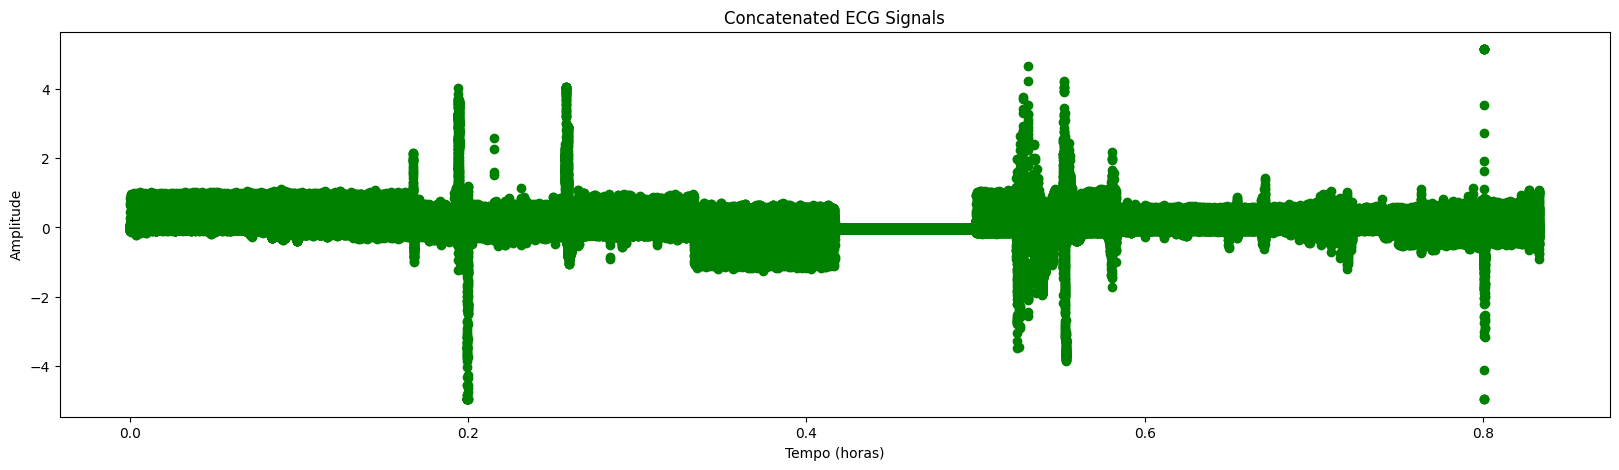

In [27]:
import matplotlib.pyplot as plt
import numpy as np

all_ecg_cropped_time = np.array([])

duracao_subconjunto_segundos = 5 * 60

for i in range(10):
    vals = vitaldb.load_case(caseids[i], ['ECG_II'], 1/100)
    
    ecg = vals[:, 0]
    intervalo_amostragem = 1/100

    ponto_inicio = np.random.randint(0, len(ecg) - int(duracao_subconjunto_segundos / intervalo_amostragem))

    subconjunto_ecg = ecg[ponto_inicio: ponto_inicio + int(duracao_subconjunto_segundos / intervalo_amostragem)]

    all_ecg_cropped_time = np.concatenate((all_ecg_cropped_time, subconjunto_ecg))

    valor_final_tempo_segundos = len(all_ecg_cropped_time) * intervalo_amostragem
    valor_final_tempo_horas = valor_final_tempo_segundos / 3600.0
    print(f'Valor final do vetor de tempo da série concatenada em segundos: {valor_final_tempo_segundos:.2f} segundos')
    print(f'Valor final do vetor de tempo da série concatenada em horas: {valor_final_tempo_horas:.2f} horas')

plt.figure(figsize=(20, 5))

tempo_segundos = np.arange(0, valor_final_tempo_segundos, intervalo_amostragem)
tempo_horas = tempo_segundos / 3600.0

plt.plot(tempo_segundos, all_ecg_cropped_time, color='g', linestyle='-', marker='o')
plt.title('Concatenated ECG Signals')
plt.xlabel('Tempo (segundos)')
plt.ylabel('Amplitude')
plt.show()

plt.figure(figsize=(20, 5))
plt.plot(tempo_horas, all_ecg_cropped_time, color='g', linestyle='', marker='o')
plt.title('Concatenated ECG Signals')
plt.xlabel('Tempo (horas)')
plt.ylabel('Amplitude')
plt.show()


In [28]:
df_all_ecg_cropped_time = pd.DataFrame({'ecg': all_ecg_cropped_time})
df_all_ecg_cropped_time.to_csv('ecg_10_subjects.csv', index=False)
print("Arquivo CSV gerado com sucesso!")

Arquivo CSV gerado com sucesso!


Valor final do vetor de tempo da série concatenada em segundos: 300.00 segundos
Valor final do vetor de tempo da série concatenada em horas: 0.08 horas


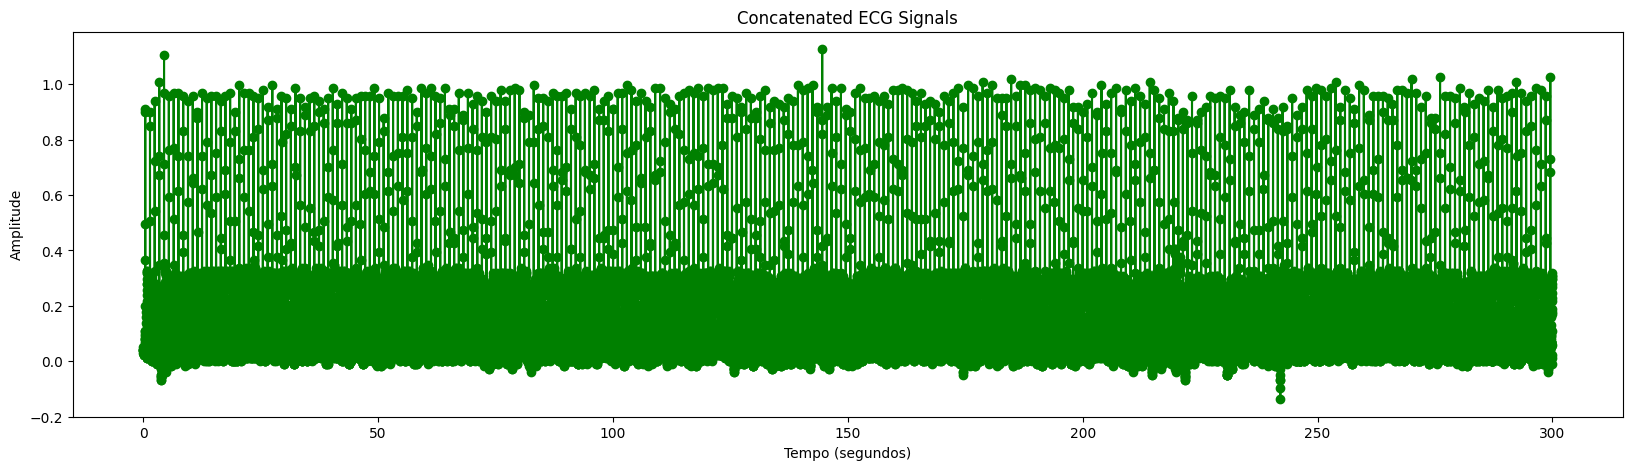

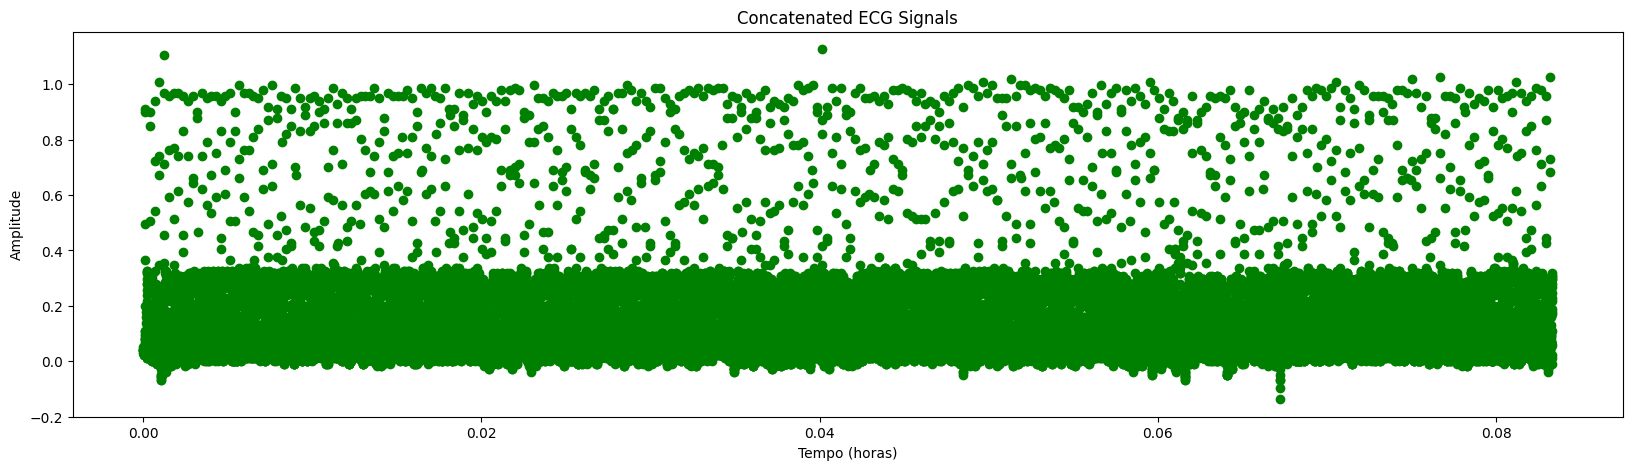

In [51]:
import matplotlib.pyplot as plt
import numpy as np

all_ecg_cropped_time = np.array([])

duracao_subconjunto_segundos = 5 * 60

# for i in range(1):
vals = vitaldb.load_case(15, ['ECG_II'], 1/100)

ecg = vals[:, 0]
intervalo_amostragem = 1/100

ponto_inicio = np.random.randint(0, len(ecg) - int(duracao_subconjunto_segundos / intervalo_amostragem))

subconjunto_ecg = ecg[ponto_inicio: ponto_inicio + int(duracao_subconjunto_segundos / intervalo_amostragem)]

all_ecg_cropped_time = np.concatenate((all_ecg_cropped_time, subconjunto_ecg))

valor_final_tempo_segundos = len(all_ecg_cropped_time) * intervalo_amostragem
valor_final_tempo_horas = valor_final_tempo_segundos / 3600.0
print(f'Valor final do vetor de tempo da série concatenada em segundos: {valor_final_tempo_segundos:.2f} segundos')
print(f'Valor final do vetor de tempo da série concatenada em horas: {valor_final_tempo_horas:.2f} horas')

plt.figure(figsize=(20, 5))

tempo_segundos = np.arange(0, valor_final_tempo_segundos, intervalo_amostragem)
tempo_horas = tempo_segundos / 3600.0

plt.plot(tempo_segundos, all_ecg_cropped_time, color='g', linestyle='-', marker='o')
plt.title('Concatenated ECG Signals')
plt.xlabel('Tempo (segundos)')
plt.ylabel('Amplitude')
plt.show()

plt.figure(figsize=(20, 5))
plt.plot(tempo_horas, all_ecg_cropped_time, color='g', linestyle='', marker='o')
plt.title('Concatenated ECG Signals')
plt.xlabel('Tempo (horas)')
plt.ylabel('Amplitude')
plt.show()


In [52]:
df_all_ecg_cropped_time = pd.DataFrame({'ecg': all_ecg_cropped_time})
df_all_ecg_cropped_time.to_csv('ecg_subject_15.csv', index=False)
print("Arquivo CSV gerado com sucesso!")

Arquivo CSV gerado com sucesso!


In [16]:
import requests
import pandas as pd
import json
from io import StringIO

In [17]:
def get_all_case_info():
    url = "https://api.vitaldb.net/cases"
    response = requests.get(url)

    if response.status_code == 200:
        csv_text = response.text.lstrip('\ufeff')
        df_info = pd.read_csv(StringIO(csv_text))
        df_info = df_info.fillna("Valor inválido (NaN)")
        return df_info
    else:
        print(f"Erro ao obter informações de casos. Código de status: {response.status_code}")
        return None

In [18]:
all_cases_info = get_all_case_info()

In [19]:
if all_cases_info is not None:
    selected_columns = [
        'caseid', 'subjectid', 'casestart', 'caseend', 'anestart', 'aneend', 'opstart', 'opend',
        'adm', 'dis', 'icu_days', 'death_inhosp', 'age', 'sex', 'height', 'weight', 'bmi', 'asa',
        'emop', 'department', 'optype', 'dx', 'opname', 'approach', 'position', 'ane_type',
        'preop_htn', 'preop_dm', 'preop_ecg', 'preop_pft', 'preop_hb', 'preop_plt', 'preop_pt',
        'preop_aptt', 'preop_na', 'preop_k', 'preop_gluc', 'preop_alb', 'preop_ast', 'preop_alt',
        'preop_bun', 'preop_cr', 'preop_ph', 'preop_hco3', 'preop_be', 'preop_pao2', 'preop_paco2',
        'preop_sao2', 'cormack', 'airway', 'tubesize', 'dltubesize', 'lmasize', 'iv1', 'iv2',
        'aline1', 'aline2', 'cline1', 'cline2', 'intraop_ebl', 'intraop_uo', 'intraop_rbc',
        'intraop_ffp', 'intraop_crystalloid', 'intraop_colloid', 'intraop_ppf', 'intraop_mdz',
        'intraop_ftn', 'intraop_rocu', 'intraop_vecu', 'intraop_eph', 'intraop_phe', 'intraop_epi',
        'intraop_ca'
    ]

    df_info_selected = all_cases_info[selected_columns]

    print(df_info_selected)

      caseid  subjectid  casestart  caseend  anestart   aneend  opstart  \
0          1       5955          0    11542      -552  10848.0     1668   
1          2       2487          0    15741     -1039  14921.0     1721   
2          3       2861          0     4394      -590   4210.0     1090   
3          4       1903          0    20990      -778  20222.0     2522   
4          5       4416          0    21531     -1009  22391.0     2591   
...      ...        ...        ...      ...       ...      ...      ...   
6383    6384       5583          0    15248      -260  15640.0     2140   
6384    6385       2278          0    20643      -544  20996.0     2396   
6385    6386       4045          0    19451      -667  19133.0     3533   
6386    6387       5230          0    12025      -550  12830.0     1730   
6387    6388       1306          0    10249       -79  10121.0     2321   

      opend     adm      dis  ...  intraop_colloid  intraop_ppf  intraop_mdz  \
0     10368 -236220

In [38]:
selected_subjectids = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

In [39]:
df_info_selected_subjects = df_info_selected[df_info_selected['caseid'].isin(selected_subjectids)]

In [40]:
df_info_selected_subjects

,caseid,subjectid,casestart,caseend,anestart,aneend,opstart,opend,adm,dis,...,intraop_colloid,intraop_ppf,intraop_mdz,intraop_ftn,intraop_rocu,intraop_vecu,intraop_eph,intraop_phe,intraop_epi,intraop_ca
0,1,5955,0,11542,-552,10848.000000,1668,10368,-236220,627780,...,0,120,0.0,100,70,0,10,0,0,0
1,2,2487,0,15741,-1039,14921.000000,1721,14621,-221160,1506840,...,0,150,0.0,0,100,0,20,0,0,0
2,3,2861,0,4394,-590,4210.000000,1090,3010,-218640,40560,...,0,0,0.0,0,50,0,0,0,0,0
3,4,1903,0,20990,-778,20222.000000,2522,17822,-201120,576480,...,0,80,0.0,100,100,0,50,0,0,0
4,5,4416,0,21531,-1009,22391.000000,2591,20291,-67560,3734040,...,0,0,0.0,0,160,0,10,900,0,2100
5,6,5586,0,5145,-51,4749.000000,2649,4449,-300600,131400,...,0,70,0.0,100,40,0,5,0,0,0
6,7,5124,0,15770,477,14817.000000,3177,14577,-154320,623280,...,0,0,0.0,0,120,0,0,0,0,0
7,8,4328,0,5918,-748,5732.000000,752,4952,-219720,212280,...,0,0,0.0,0,70,0,0,0,0,0
8,9,2008,0,4481,-481,4499.000000,899,3299,-135900,36900,...,0,0,0.0,0,50,0,0,0,0,0
9,10,2175,0,20992,-1743,21057.000000,2457,19857,-220740,3580860,...,0,90,0.0,0,110,0,20,500,0,600


In [41]:
selected_columns = ['caseid', 'sex', 'age', 'height', 'weight', 'bmi']

In [42]:
df_info_selected_subjects_table = df_info_selected_subjects[selected_columns]

In [43]:
df_info_selected_subjects_table = df_info_selected_subjects_table.rename(columns={'caseid': 'id'})

In [44]:
df_info_selected_subjects_table

,id,sex,age,height,weight,bmi
0,1,M,77.0,160.2,67.50,26.3
1,2,M,54.0,167.3,54.80,19.6
2,3,M,62.0,169.1,69.70,24.4
3,4,M,74.0,160.6,53.00,20.5
4,5,M,66.0,171.0,59.70,20.4
5,6,F,78.0,150.0,54.60,24.3
6,7,F,52.0,167.7,62.30,22.2
7,8,F,81.0,156.7,67.25,27.4
8,9,F,32.0,157.9,50.90,20.4
9,10,M,72.0,162.5,62.75,23.8


In [53]:
print(df_info_selected_subjects_table)

    id sex   age  height  weight   bmi
0    1   M  77.0   160.2   67.50  26.3
1    2   M  54.0   167.3   54.80  19.6
2    3   M  62.0   169.1   69.70  24.4
3    4   M  74.0   160.6   53.00  20.5
4    5   M  66.0   171.0   59.70  20.4
5    6   F  78.0   150.0   54.60  24.3
6    7   F  52.0   167.7   62.30  22.2
7    8   F  81.0   156.7   67.25  27.4
8    9   F  32.0   157.9   50.90  20.4
9   10   M  72.0   162.5   62.75  23.8
10  11   M  56.0   175.4   81.45  26.5
11  12   F  46.0   169.2   81.40  28.4
12  13   F  67.0   153.0   64.90  27.7
13  14   M  23.0   177.9   80.00  25.3
14  15   F  56.0   158.0   48.30  19.3
